##### Copyright 2021 The C-HACKMASTERS.

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Answer Key Tutorial 5 Breakout room

Let's load our libraries

In [1]:
# Pandas library for the pandas dataframes
import pandas as pd    

# Scikit-Learn library for the regression models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# number libraries
import numpy as np

# Plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt

matplotlib.rcParams.update({'font.size': 20})

%load_ext autoreload
%autoreload 2

### Problem 1) Number and choice of input features / Bias and variance

Load the Boston dataset and evaluate how the linear regression predictions changes as you change the **number and choice of input features**. The total number of columns in X  is 13 and each column represent a specific input feature. 

#### 1.1 Look at a few features

In [2]:
# Load the boston dataset and separate it in input features X and output variable y
X, y = datasets.load_boston(return_X_y=True) 
# Make a second split of X and y to get a dataset to train with and a set to predict 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9) 

 From the documentation listed [here](https://scikit-learn.org/stable/datasets/index.html#boston-dataset) we know that the 13 input feature variables in X are


        CRIM per capita crime rate by town

        ZN proportion of residential land zoned for lots over 25,000 sq.ft.

        INDUS proportion of non-retail business acres per town

        CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

        NOX nitric oxides concentration (parts per 10 million)

        RM average number of rooms per dwelling

        AGE proportion of owner-occupied units built prior to 1940

        DIS weighted distances to five Boston employment centres

        RAD index of accessibility to radial highways

        TAX full-value property-tax rate per $10,000

        PTRATIO pupil-teacher ratio by town

        B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

        LSTAT % lower status of the population

And for y

        MEDV Median value of owner-occupied homes in $1000’s



Let's choose 4 different sets of input features from the overall set and look at how that changes the error in output. Specifically we will consider


* DIS ( 8th input feature )
* AGE ( 7th input feature )
* DIS and AGE ( 8th and 7th input features )
* DIS and RM ( 8th and 6th input features )

We need to extract the 4 training datasets from our overall <code>X_train</code> dataset and similarly the corresponding testing datasets.


In [3]:
## Define the 4 training datasets
# DIS feature (feature 8), reshape ensures that the array is the correct 2d shape
X_train_DIS = X_train[:,7].reshape(-1,1)
# AGE feature (feature 7)
X_train_AGE = X_train[:,6].reshape(-1,1)
# DIS and AGE features together - notice list indices [6,7] to select two columns
X_train_DIS_AGE = X_train[:,[6,7]]
# DIS and RM features together 
X_train_DIS_RM = X_train[:,[6,8]]

## Define the corresponding testing datasets
X_test_DIS = X_test[:,7].reshape(-1,1)
X_test_AGE = X_test[:,6].reshape(-1,1)
X_test_DIS_AGE = X_test[:,[6,7]]
X_test_DIS_RM = X_test[:,[6,8]]

Let's look at the first few elements of each

In [4]:
print('DIS train data:\n', X_train_DIS[0:4])
print('AGE train data:\n', X_train_AGE[0:4])
print('DIS AGE train data:\n', X_train_DIS_AGE[0:4])
print('DIS RM train data:\n', X_train_DIS_RM[0:4])

DIS train data:
 [[2.5979]
 [2.0869]
 [3.4952]
 [2.8617]]
AGE train data:
 [[62.2]
 [92.9]
 [62.5]
 [88.5]]
DIS AGE train data:
 [[62.2     2.5979]
 [92.9     2.0869]
 [62.5     3.4952]
 [88.5     2.8617]]
DIS RM train data:
 [[62.2  3. ]
 [92.9  2. ]
 [62.5  2. ]
 [88.5  8. ]]


Now we combine each of these sets into a list to have one main variable - the list which contains each dataset

In [5]:
## Place all of these in a list to be iteratred over
X_train_list = [X_train_DIS, X_train_AGE, X_train_DIS_AGE, X_train_DIS_RM]
X_test_list = [X_test_DIS, X_test_AGE, X_test_DIS_AGE, X_test_DIS_RM]

Let's see what the list looks like by iterating over each of the variable values we assigned to the list in the previous cell

In [6]:
for X_train_set in X_train_list:
  print(X_train_set[0:5])

[[2.5979]
 [2.0869]
 [3.4952]
 [2.8617]
 [2.4298]]
[[62.2]
 [92.9]
 [62.5]
 [88.5]
 [95.4]]
[[62.2     2.5979]
 [92.9     2.0869]
 [62.5     3.4952]
 [88.5     2.8617]
 [95.4     2.4298]]
[[62.2  3. ]
 [92.9  2. ]
 [62.5  2. ]
 [88.5  8. ]
 [95.4 24. ]]


OK, it all looks good. Now let's train and predict for each training and testing set in the list

In [7]:
# We create an empty list to contain the values of y predicted for each model trained on one the lists training sets
y_predicted = []
# Similarly we will store the prediction errors in a list which we initialize here
predict_errors = []
# We also decide to store the trained models in a list ( you can think of your list as a container of variables! )
models = []

# We iterate through each of 4 sets of features (Note that we could have also used a function called enumerate() )
for i in range(0,4):

  # Create a linear regression model
  regr_tmp = linear_model.LinearRegression()

  # Train the model by using the i-th training dataset of the list, 
  # if i=0 then the training set is based on DIS, if i=1 its the AGE training set and so on...
  regr_tmp.fit(X_train_list[i], y_train)
  # Make predictions on test set
  y_predicted_tmp = regr_tmp.predict(X_test_list[i])

  # Store the values of y predicted by the model trained on the i-th training set - y_predicted_tmp in our list
  y_predicted.append(y_predicted_tmp)
  # Store the values of the errore computed as MSE in the list
  predict_errors.append(mean_squared_error(y_test, y_predicted_tmp))
  # Store the models we obtained by fitting on the training set in our models list
  models.append(regr_tmp)

  # Note that all variable listed as name_tmp change at each iteration of the for loop!

The errors for the 4 feature sets:
 [92.40411193691833, 80.98678577574518, 80.6564904096789, 76.32217428994537]


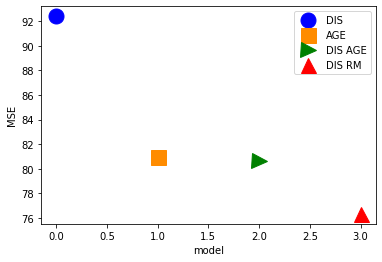

In [8]:
## Now lets look at the values of the error in a plot and also print them out
print('The errors for the 4 feature sets:\n', predict_errors)

plt.plot(0,predict_errors[0],'o',markersize=15,color='b')
plt.plot(1,predict_errors[1],'s',markersize=15,color='darkorange')
plt.plot(2,predict_errors[2],'>',markersize=15,color='g')
plt.plot(3,predict_errors[3],'^',markersize=15,color='r')
plt.xlabel('model')
plt.ylabel('MSE')
plt.legend(['DIS','AGE','DIS AGE','DIS RM'])
plt.show()

We see that AGE on its own is better than DIS as an input feature (remember we want low error). When they are combined we do not gain a lot over AGE. This could also have been understood from the fact that those two variables are strongly correlated (see the heat map plot in section 5.4.3 of the main lecture). Therefore the model does not gain when we use both. On the other hand when we combine DIS with RM we see a lower MSE. This comes from the fact that DIS and RM are less strongly correlated and therefore contain different information which the model can learn from.

We could also look at the scatter plots here

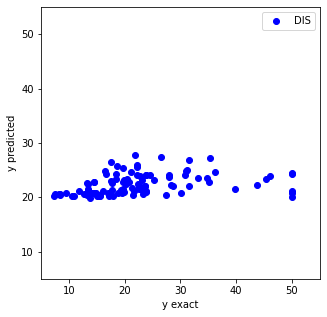

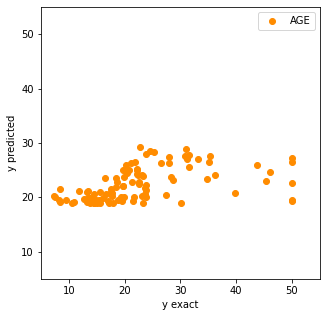

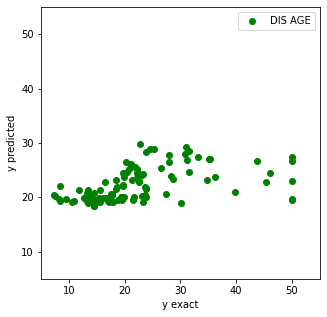

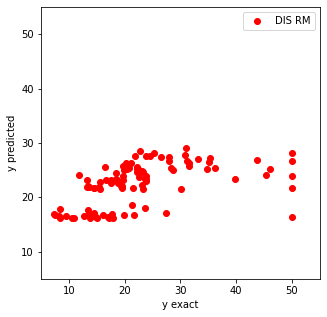

In [9]:
colors = ['b','darkorange','g','r']
labels = ['DIS', 'AGE', 'DIS AGE', 'DIS RM']
for i in range(0,4):
  plt.figure(figsize=(5,5))
  plt.scatter(y_test, y_predicted[i], color=colors[i])
  plt.legend([labels[i]])
  plt.xlabel('y exact')
  plt.ylabel('y predicted')
  plt.xlim([5,55])
  plt.ylim([5,55])

We can see from both the error values and the scatter plot that each of these models is making a significant amount of error. If the fit was good we would expect to see all points along the diagonal or close to it. But what we see is that its not a question of how many input features but more about which input features!

If we had used all input features we would have found a much better fit (does this contradict our idea that we need more features?)

MSE all features =  23.676620280791226


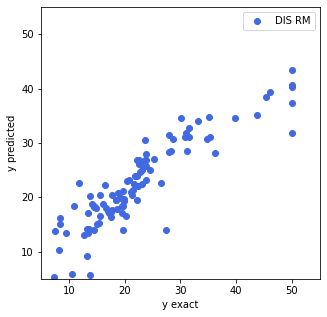

In [11]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_predicted = regr.predict(X_test)
mse = mean_squared_error(y_test, y_predicted)

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_predicted, color='royalblue')
plt.legend([labels[i]])
plt.xlabel('y exact')
plt.ylabel('y predicted')
plt.xlim([5,55])
plt.ylim([5,55])

print('MSE all features = ', mse)

Now we drop the 'INDUS' variable - the third of the input features

MSE all features minus the INDUS feature =  23.676620280791226


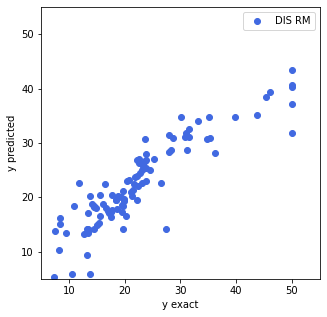

In [12]:
regr = linear_model.LinearRegression()
X_train_no_INDUS = X_train[:,[0,1,3,4,5,6,7,8,9,10,11,12]]
X_test_no_INDUS = X_test[:,[0,1,3,4,5,6,7,8,9,10,11,12]]
regr.fit(X_train_no_INDUS, y_train)

y_predicted = regr.predict(X_test_no_INDUS)
mse_no_INDUS = mean_squared_error(y_test, y_predicted)

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_predicted, color='royalblue')
plt.legend([labels[i]])
plt.xlabel('y exact')
plt.ylabel('y predicted')
plt.xlim([5,55])
plt.ylim([5,55])

print('MSE all features minus the INDUS feature = ', mse)

In [14]:
print('All input features MSE:', mse,'\nAll features without INDUS - MSE:', mse_no_INDUS)

All input features MSE: 23.676620280791226 
All features without INDUS - MSE: 23.652518792530763


We see that by removing the INDUS feature the model does better - we find a smaller MSE! So at the end of the day it really is a question of how much information the model can extract from the input features and it requires us to test many options!

#### 1.3 Bias and Variance

To estimate the variance of our model, we can train it on different subests of the training data, and see how these models perform relative to the average performance. As a rough estimate, let's test creating 10 training datasets by selecting a third of the data at random and a different random subset every time.

In [15]:
## Let's extract 10 random samples of the training data, each containing 1/3 of the total training data

# Get number of data points in X_train
N_points = len(X_train)

# Get number of data points we want in each of the 10 training sets - note that this number must be an integer not a float - that's why we use int!
N_points_third = int(N_points/3)

X_train_list = []
y_predicted_list = []

# Now we extract the data 10 times
N_ite = 10
y_predicted_ave = np.zeros(len(y_test))

for i in range(0, N_ite):

  # Select N_points_third integers which will correspond to the indices of rows in the training dataset at random 
  # We store them in a list called ind
  ind = np.random.randint(0, N_points, N_points_third)

  # Now we use them to define the training set and store each training set in a list of training sets
  X_train_tmp = X_train[ind]
  X_train_list.append(X_train_list)

  # We fit our model to each te
  regr_tmp = linear_model.LinearRegression()
  regr_tmp.fit(X_train_tmp, y_train[ind])

  y_predicted_tmp = np.array(regr_tmp.predict(X_test))
  mse_tmp = mean_squared_error(y_test, y_predicted_tmp)

  y_predicted_ave = y_predicted_ave + y_predicted_tmp
  y_predicted_list.append( y_predicted_tmp )


In [16]:
# Let's compute the variance
y_predicted_ave /= N_ite
variance = []
for i in range(0, N_ite):
    variance.append(np.sqrt(np.linalg.norm(y_predicted_list[i] - y_predicted_ave))/len(y_test))

print(variance)

[0.041418571426570176, 0.038118490806137544, 0.04884886003223289, 0.035143753909467904, 0.041105462865139324, 0.04264627479879751, 0.03481756642439187, 0.03989235109151351, 0.049705472659128225, 0.052620587643964135]


In order to determine bias, we would need the the exact model for the system. In most cases, such as this, we do not know the exact model. Because of this, often the best we can do is estimate it with respect to the variance and the error. See this document for a tool to help with this, which wraps up the work here to estimate variance along with some other statistical tools. https://machinelearningmastery.com/calculate-the-bias-variance-trade-off/

### Problem 2) Beyond linear regression
Compare a LASSO model to the model that you produced. What is the LASSO model doing compared to the work you've done on these problems? If you have time, explore some other regression models (maybe PLS, or Guassian Processing models?) What advantages and disadvantages do they have?


### 2.1 LASSO model

scikit learn has a LASSO model ready coded just like the basic linear regression.

In [17]:
## Train a lasso model on the whole training dataset
#. load the model
LASSO = linear_model.Lasso()

#. train it on the training data
LASSO.fit(X_train, y_train)

#. evaluate the performance
y_predict = LASSO.predict(X_test)
error = mean_squared_error(y_test, y_predict)

#. report it
print('The lasso model has an MSE of {}'.format(error))

The lasso model has an MSE of 32.39200970946139


With almost no effort the LASSO model did almost as well as our optimum after a good amount of work trying to figure out the best features! It was able to achieve this because the model does a bit of work to determine the best features for us. It does this using L1 regularization, which means that along with the raw prediction error, the training is penalizing features that are very impactful to the regression model. This means that only truly impactful features (ones with enough correlation to overcome that penalty) are selected.

We can even see which features it selected!

In [18]:
## which coeficients remain in the model
LASSO.coef_ != 0

array([ True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True])

We can actually see that features 3, 4, and 5 (INDUS, CHAS, NOX) were eliminated. CHAS is actually a dummy variable without impact on the y variable, so the LASSO worked!

We can actually tune the penalty applied as well through the alpha input.

In [19]:
## Train a lasso model on the whole training dataset
#. load the model
LASSO = linear_model.Lasso(alpha=0.1)

#. train it on the training data
LASSO.fit(X_train, y_train)

#. evaluate the performance
y_predict = LASSO.predict(X_test)
error = mean_squared_error(y_test, y_predict)

#. report it
print('The lasso model has an MSE of {}'.format(error))

The lasso model has an MSE of 26.882036525758583


You can see the LASSO model is now performing significantly better than the basic linear model we put a bunch of effort into.

#### 2.2 PLS model
Let's quickly see how an out of the box PLS model performs

In [20]:
from sklearn.cross_decomposition import PLSRegression

In [21]:
## Train a PLS model on the whole training dataset
#. load the model
PLS = PLSRegression()

#. train it on the training data
PLS.fit(X_train, y_train)

#. evaluate the performance
y_predict = PLS.predict(X_test)
error = mean_squared_error(y_test, y_predict)

#. report it
print('The PLS model has an MSE of {}'.format(error))

The PLS model has an MSE of 27.765626977659814


It did super well with no tuning! It turns out that PLS is fairly suited for the Boston dataset, but it has some disadvantages. PLS can sometimes have trouble identifying true correlations as it tries to minimize chance correlations. It also is very sensitive to the descriptor scaling, so if in the future your input data is being collected on a different scale or range, it will fail.